Младшему исследователю из Вашего отдела дали выполнить задание по дизайну признаков (фич) в новом проекте.
Определите слабые стороны этого решения и попробуйте улучшить результат (RMSE).

Задача была сформулирована так: придумать такие дискретные фичи (не более 5 фичей, каждая фича имеет не более 5 значений), чтобы максимально точно предсказывать по ним значения c3, c4, c5 из имеющегося датасета.

Помимо новых дискретных фич допускается использование c1, c2 и d1 в качестве входных переменных (X).

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('test_data.csv', header=0, index_col=0)

In [ ]:
df.head()

,c1,c2,c3,c4,c5,d1
0,1702.339676,97.151127,1187.449039,1090.136386,1106.530204,0.0
1,1667.720643,80.366907,1081.197827,945.367799,1087.782255,1.0
2,1719.730118,69.581754,967.808030,812.721484,995.881811,0.0
3,1681.895917,96.473315,1146.784418,1047.934966,1112.788168,0.0
4,1880.594545,90.238614,1056.165331,909.991794,1021.066083,0.0


In [ ]:
def get_discrete_feature1(df):
    if pd.isna(df['c3']) or pd.isna(df['c5']) or pd.isna(df['c4']):
        return None

    c5 = df['c5']
    c3 = df['c3']
    c4 = df['c4']

    if c3 - c5 >= 92 and c3 - c4 < 230:
        return 'cl1'

    if c5 - c3 < 92 and c3 - c5 < 92 and c3 - c4 < 230 and c5 - c4 < 250:
        return 'cl2'

    if c3 - c5 <= 25 and c5 - c3 < 92 and c3 - c4 >= 230:
        return 'cl3'

    if c5 - c3 >= 92 and c5 - c4 < 230:
        return 'cl4'

    else:
        return 'cl5'

In [ ]:
# add categorial features
for ind in df.index:
    row = df.loc[ind]
    df.loc[ind, 'd2'] = get_discrete_feature1(row)
df = df.dropna()  

In [ ]:
df.head()

,c1,c2,c3,c4,c5,d1,d2
0,1702.339676,97.151127,1187.449039,1090.136386,1106.530204,0.0,cl2
1,1667.720643,80.366907,1081.197827,945.367799,1087.782255,1.0,cl2
2,1719.730118,69.581754,967.808030,812.721484,995.881811,0.0,cl2
3,1681.895917,96.473315,1146.784418,1047.934966,1112.788168,0.0,cl2
4,1880.594545,90.238614,1056.165331,909.991794,1021.066083,0.0,cl2


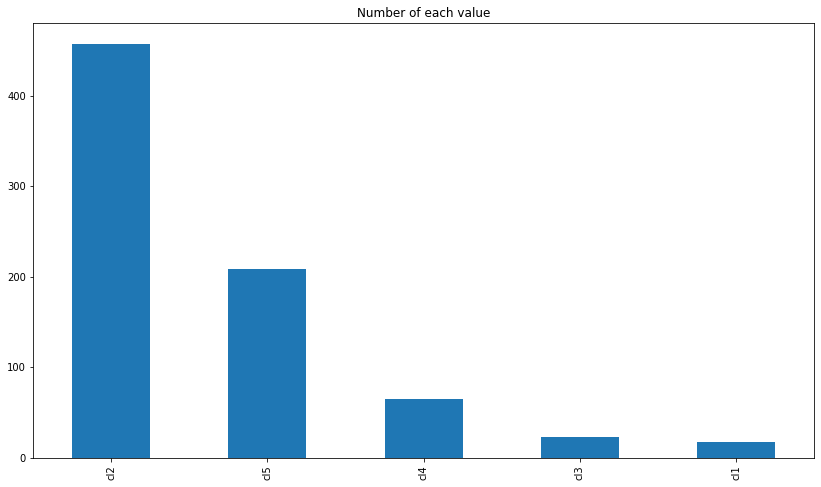

In [ ]:
ax = df['d2'].value_counts().plot(kind='bar', figsize=(14,8), title="Number of each value")


In [ ]:
x_features = ['c1', 'c2', 'd1', 'd2']
y_features = ['c3', 'c4', 'c5']

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(silent=True, loss_function='MultiRMSE').fit(train_df[x_features], train_df[y_features], cat_features=[3])

In [ ]:
def rmse(a1, a2):
    diff = (a1 - a2)
    return float(np.mean(np.sqrt(np.mean(diff ** 2, axis=0))))


In [ ]:
pred = np.array(model.predict(test_df[x_features]))

print(rmse(pred, test_df[y_features].to_numpy()))

48.64738840699386
